# Multiple Linear Regression Exercises

## a) Calculate the parameter estimates (β0, β1, β2 and σ2), in addition find the usual 95% confidence intervals for β0, β1, and β2.

In [ ]:
# Load the data
D <- data.frame(
  x1=c(0.58, 0.86, 0.29, 0.20, 0.56, 0.28, 0.08, 0.41, 0.22, 0.35,
       0.59, 0.22, 0.26, 0.12, 0.65, 0.70, 0.30, 0.70, 0.39, 0.72,
       0.45, 0.81, 0.04, 0.20, 0.95),
  x2=c(0.71, 0.13, 0.79, 0.20, 0.56, 0.92, 0.01, 0.60, 0.70, 0.73,
       0.13, 0.96, 0.27, 0.21, 0.88, 0.30, 0.15, 0.09, 0.17, 0.25,
       0.30, 0.32, 0.82, 0.98, 0.00),
  y=c(1.45, 1.93, 0.81, 0.61, 1.55, 0.95, 0.45, 1.14, 0.74, 0.98,
       1.41, 0.81, 0.89, 0.68, 1.39, 1.53, 0.91, 1.49, 1.38, 1.73,
       1.11, 1.68, 0.66, 0.69, 1.98)
)

fit_full <- lm(y ~ x1 + x2, data = D)
summary(fit_full)       # parameter estimates & tests
confint(fit_full, 0.95) # 95% CIs
summary(fit_full)$sigma^2   # σ² estimate


Call:
lm(formula = y ~ x1 + x2, data = D)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15493 -0.07801 -0.02004  0.04999  0.30112 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.433547   0.065983   6.571 1.31e-06 ***
x1          1.652993   0.095245  17.355 2.53e-14 ***
x2          0.003945   0.074854   0.053    0.958    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1127 on 22 degrees of freedom
Multiple R-squared:  0.9399,	Adjusted R-squared:  0.9344 
F-statistic:   172 on 2 and 22 DF,  p-value: 3.699e-14


2.5 %,97.5 %


[1] 0.01270523

## b) Reduce the model if appropriate (α = 0.05)

In [ ]:
fit <- lm(y ~ x1, data = D)
anova(fit_full, fit)    # confirms x2 not needed
summary(fit)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,22,0.2795150,NA,NA,NA,NA
2,23,0.2795503,-1,-3.528751e-05,0.002777401,0.9584457



Call:
lm(formula = y ~ x1, data = D)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15633 -0.07633 -0.02145  0.05157  0.29994 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.43609    0.04399   9.913 9.02e-10 ***
x1           1.65121    0.08707  18.963 1.54e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1102 on 23 degrees of freedom
Multiple R-squared:  0.9399,	Adjusted R-squared:  0.9373 
F-statistic: 359.6 on 1 and 23 DF,  p-value: 1.538e-15


## c) Residual analysis


	Shapiro-Wilk normality test

data:  residuals(fit)
W = 0.93532, p-value = 0.1154


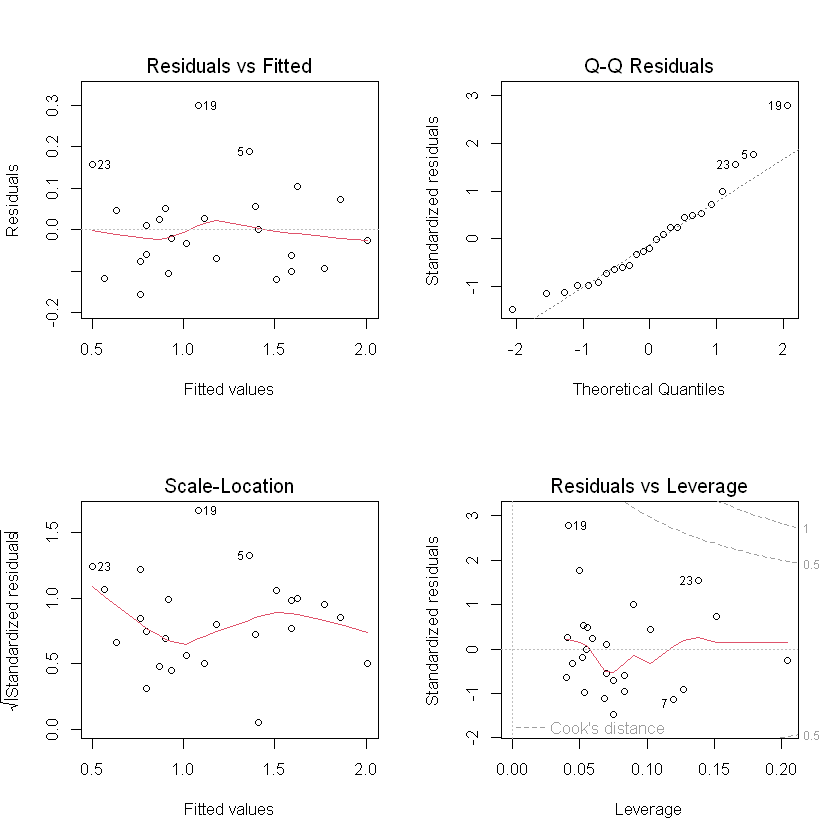

In [ ]:
par(mfrow = c(2, 2))
plot(fit)                         # diagnostic plots
shapiro.test(residuals(fit))      # normality check

## d) Fitted line with 95% confidence & prediction intervals

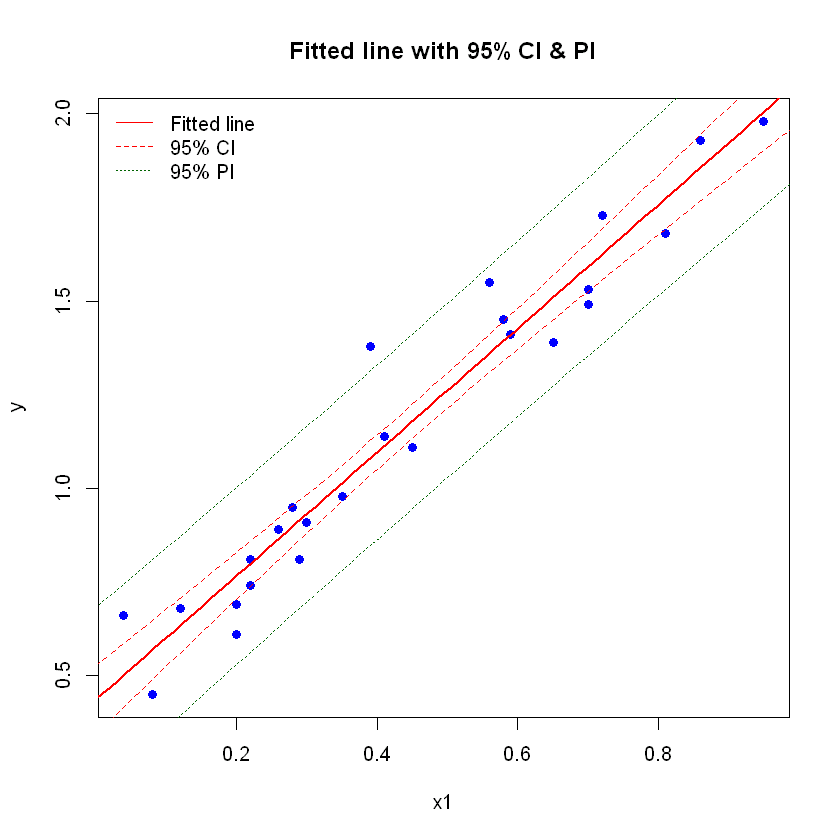

In [ ]:
new_x1 <- data.frame(x1 = seq(0, 1, length.out = 100))
ci <- predict(fit, new_x1, interval = "confidence")
pi <- predict(fit, new_x1, interval = "prediction")

plot(D$x1, D$y, pch = 19, col = "blue",
     xlab = "x1", ylab = "y",
     main = "Fitted line with 95% CI & PI")
lines(new_x1$x1, ci[,"fit"], col = "red", lwd = 2)
lines(new_x1$x1, ci[,"lwr"], col = "red", lty = 2)
lines(new_x1$x1, ci[,"upr"], col = "red", lty = 2)
lines(new_x1$x1, pi[,"lwr"], col = "darkgreen", lty = 3)
lines(new_x1$x1, pi[,"upr"], col = "darkgreen", lty = 3)
legend("topleft",
       legend = c("Fitted line", "95% CI", "95% PI"),
       col = c("red", "red", "darkgreen"),
       lty = c(1, 2, 3), bty = "n")

# MLR simulation exercise

In [ ]:
## Load data
D <- data.frame(
  y  = c(9.29,12.67,12.42,0.38,20.77,9.52,2.38,7.46),
  x1 = c(1,2,3,4,5,6,7,8),
  x2 = c(4,12,16,8,32,24,20,28)
)

## a) Plots of y vs x1 and y vs x2

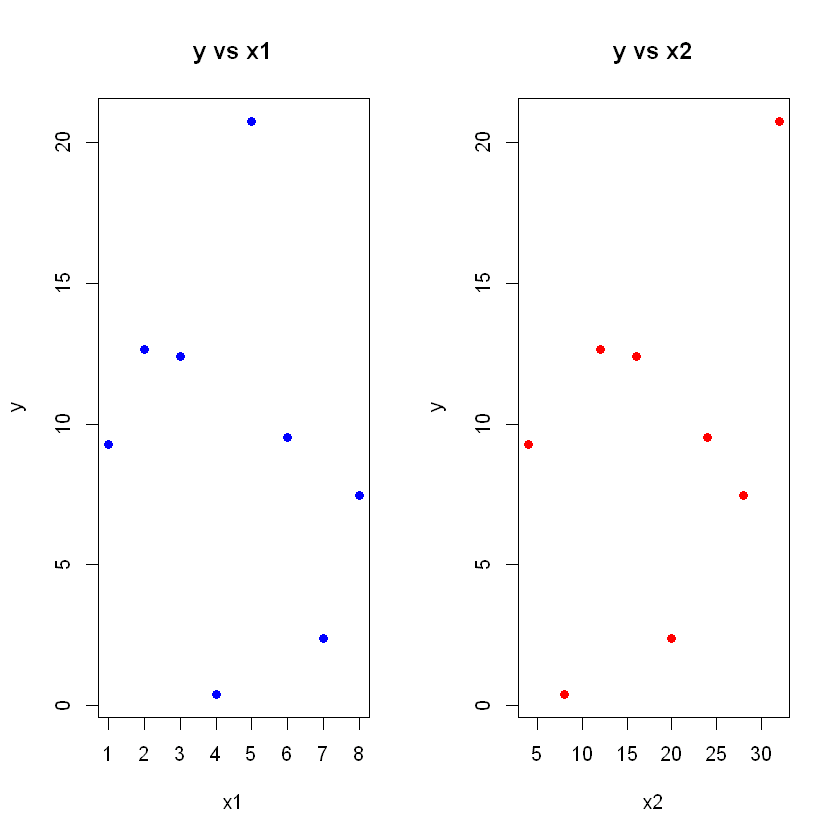

In [ ]:
par(mfrow = c(1, 2))                 # two plots side by side
plot(D$x1, D$y, pch = 19, col = "blue",
     xlab = "x1", ylab = "y", main = "y vs x1")
plot(D$x2, D$y, pch = 19, col = "red",
     xlab = "x2", ylab = "y", main = "y vs x2")
par(mfrow = c(1, 1))

The plot of **y vs x1** shows no obvious upward or downward trend—the points are scattered.

The plot of **y vs x2** is also diffuse. Neither predictor shows a clear linear relationship with y.

## b) Fit the two simple linear models

In [ ]:
fit_x1 <- lm(y ~ x1, data = D)
fit_x2 <- lm(y ~ x2, data = D)

# Summaries with parameter estimates and p-values
summary(fit_x1)
summary(fit_x2)

# 95% confidence intervals for coefficients
confint(fit_x1, level = 0.95)
confint(fit_x2, level = 0.95)


Call:
lm(formula = y ~ x1, data = D)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2942 -3.0504  0.6933  1.8381 11.7217 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  12.1775     5.1984   2.343   0.0576 .
x1           -0.6258     1.0294  -0.608   0.5655  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.672 on 6 degrees of freedom
Multiple R-squared:  0.05802,	Adjusted R-squared:  -0.09897 
F-statistic: 0.3696 on 1 and 6 DF,  p-value: 0.5655



Call:
lm(formula = y ~ x2, data = D)

Residuals:
   Min     1Q Median     3Q    Max 
-7.554 -5.104  1.036  4.212  7.397 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   4.2039     4.8069   0.875    0.415
x2            0.2865     0.2380   1.204    0.274

Residual standard error: 6.169 on 6 degrees of freedom
Multiple R-squared:  0.1946,	Adjusted R-squared:  0.06035 
F-statistic:  1.45 on 1 and 6 DF,  p-value: 0.2739


,2.5 %,97.5 %
(Intercept),-0.5426374,24.897637
x1,-3.1447959,1.893129


,2.5 %,97.5 %
(Intercept),-7.5580921,15.9659492
x2,-0.2957889,0.8688246


**Linear model with x1**

Model: 𝑦 = 𝛽0 + 𝛽1𝑥1 + 𝜀

| term      | estimate |        95% CI | p-value |
| --------- | -------: | ------------: | ------: |
| Intercept |    12.18 | –0.54 , 24.90 |   0.058 |
| x1 slope  |    –0.63 |  –3.14 , 1.89 |   0.566 |

- The slope is small and the confidence interval includes 0.

- 𝑅2 = 0.06: x1 explains only about 6 % of the variation in y.

**Linear model with x2**

Model: 𝑦 = 𝛽0 + 𝛽1𝑥2 + 𝜀

| term      | estimate |        95% CI | p-value |
| --------- | -------: | ------------: | ------: |
| Intercept |     4.20 | –7.56 , 15.97 |   0.415 |
| x2 slope  |     0.29 |  –0.30 , 0.87 |   0.274 |

- The slope is not significant; its confidence interval also spans 0.

- 𝑅2 = 0.19: x2 explains about 19 % of the variation, still weak.

**Interpretation**

- Neither x1 nor x2 provides a statistically significant linear relationship with y at the 5 % level.

- Both models have wide confidence intervals and low R² values, so the data do not support using x1 or x2 alone to predict y.

- The visual scatterplots agree: there is no clear linear trend.

We can conclude that, with this small dataset, **neither x1 nor x2 is an effective predictor of y in a simple linear model**.